<a href="https://colab.research.google.com/github/DJ-Adams/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# Prediction of Product Sales

# Prediction of Product Sales

- ###### Author: Darlene Adams

original data source - https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

## Project Overview

#Imports

In [126]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

## Warnings
import warnings

###Data Dictionary

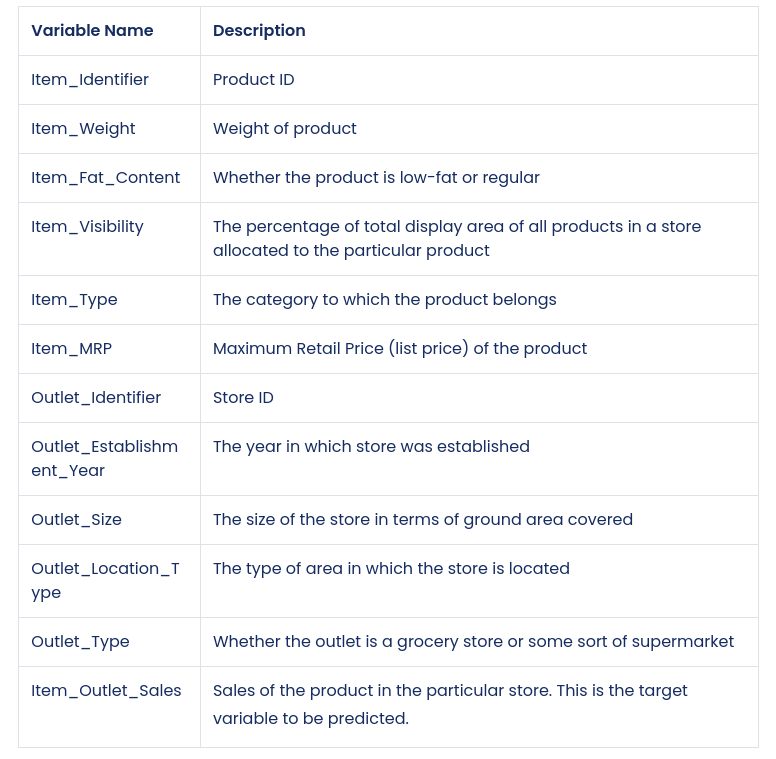

## Load and Inspect Data

In [127]:
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

###1) How many rows and columns?

In [129]:
df.shape

(8523, 12)

- There are 8523 rows and 12 columns

###2) What are the datatypes of each variable?

In [130]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###3) Are there duplicates? If so, drop any duplicates.

In [131]:
# create and save filter for duplicates
duplicated_rows = df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [132]:
# count the duplicates
df.duplicated().sum()

0

- There are no duplicates

###4) Identify missing values.

In [133]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [134]:
# Get the % of null values
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [135]:
# save the filter for missing data in item weight
null_item_weight = df['Item_Weight'].isna()
null_item_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [136]:
# save the filter for missing data in item weight
null_outlet_size = df['Outlet_Size'].isna()
null_outlet_size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [137]:
# Use the filter for item weight
df[null_item_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [138]:
# Use the filter for outlet size
df[null_outlet_size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


###5) Address the missing values by using a placeholder value.

###6) Confirm that there are no missing values after addressing them.

In [139]:
# Filling null values in the Item Weight with -1
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

0

In [140]:
# Using the list of cat_cols to fillna
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size'].isna().sum()

0

###7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [141]:
# Identify string columns and save as variable
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [142]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- In the item fat content column there are inconsistencies that need to be addressed - low fat and  LF need to be changed to Low Fat and reg needs to be changed to Regular

In [143]:
# Standardize the values in the Item fat content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat','reg' : "Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Outlet size refers to ground cover will be changing High to Large

In [144]:
# Standardize the values in the outlet size column column
df['Outlet_Size'] = df['Outlet_Size'].replace({'High':"Large"})
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

###8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [145]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## Exploratory Data Analysis"

######Review the info again before creating visuals

In [146]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [147]:
# identify the numeric columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

###Histograms of columns to gain a generic overview

Text(0, 0.5, 'Number of Items')

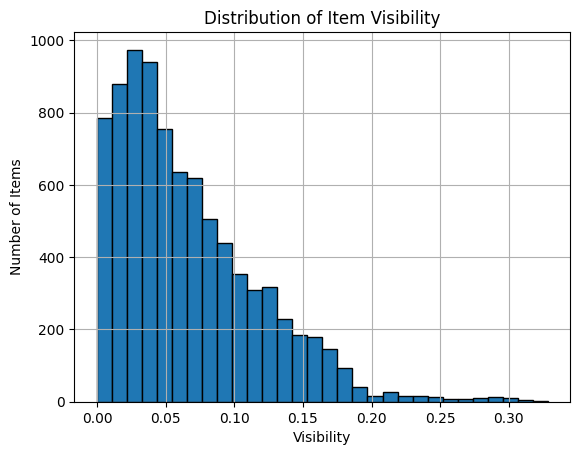

In [148]:
ax = df['Item_Visibility'].hist(bins = 30, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Visibility')
ax.set_ylabel('Number of Items')

- There is a wide range of distribution, with the majority of items having 10% or less shelf space allocated to them

Text(0, 0.5, 'Number of Items')

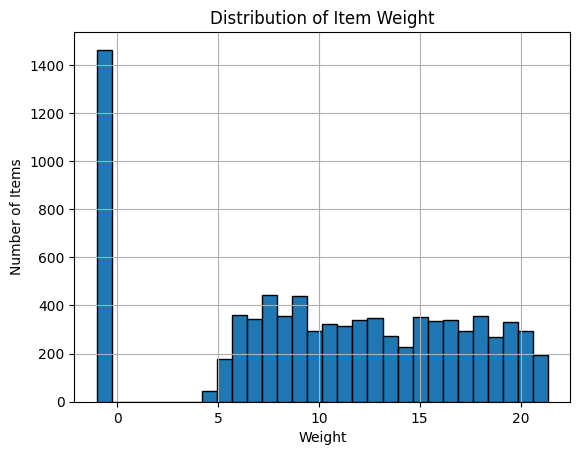

In [149]:
ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('Number of Items')

- There is no clear identification of the unit of measurement for weight. A standard is ounces and that would fit the parameters. The majority of products are between 5 and 20 and they are close to evenly distributed.
- There is a gap and a substantial percentage of items under 0

Text(0, 0.5, 'Number of Items')

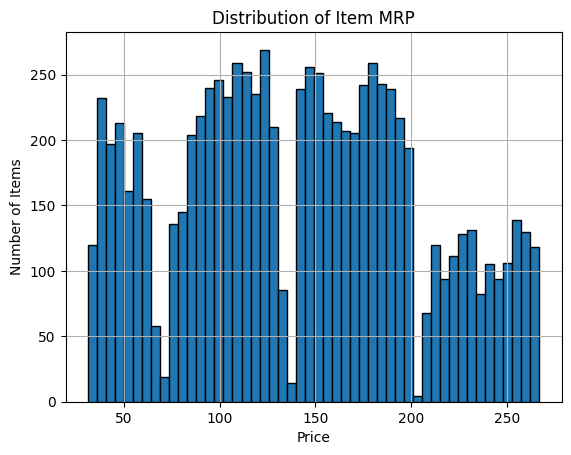

In [150]:
ax = df['Item_MRP'].hist(bins = 50, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Price')
ax.set_ylabel('Number of Items')

- As expected there is wide distribution of item prices. The prices are concentrated around the 75- 200 range

Text(0, 0.5, 'Number of Items')

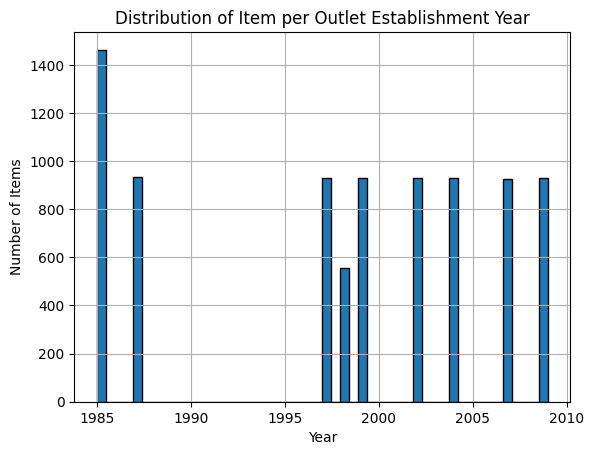

In [151]:
ax = df['Outlet_Establishment_Year'].hist(bins = 50, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item per Outlet Establishment Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Items')

- when they first established they introduced the most products in the original store
- they established 3 stores in the late 1990's.
- there was about a decade where they didn't open any from the late 1980's to the late 1990's

Text(0, 0.5, 'Number of Items')

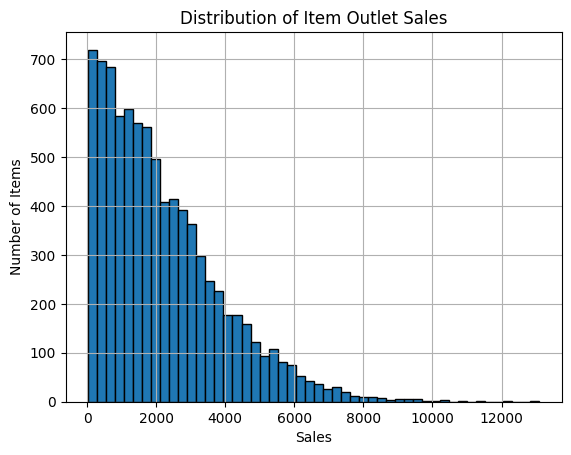

In [152]:
ax = df['Item_Outlet_Sales'].hist(bins = 50, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Number of Items')

- The bulk sales seem to come from the sale of a few items. A large number of the items bring in less than 6000 of the revenue

#####Exploratory Analysis with Box Plots

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Text(0.5, 1.0, 'Comparing Outlet Sales by Item')

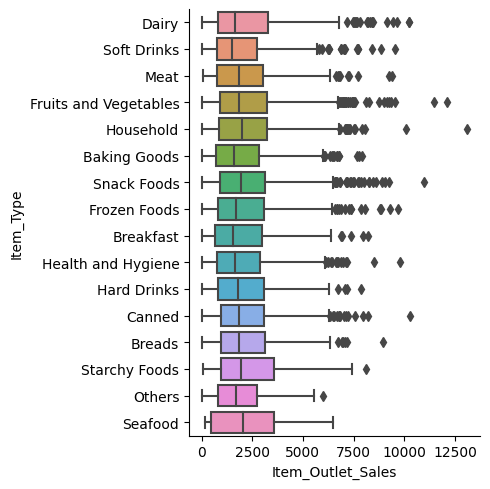

In [154]:
g = sns.catplot(data=df, x='Item_Outlet_Sales', y='Item_Type',
                kind='box', dodge=False)
ax.set_title("Comparing Outlet Sales by Item")

- For each item type there is very little difference in the min, median, max, and quartiles. The outliers have a substantial influence on sales.

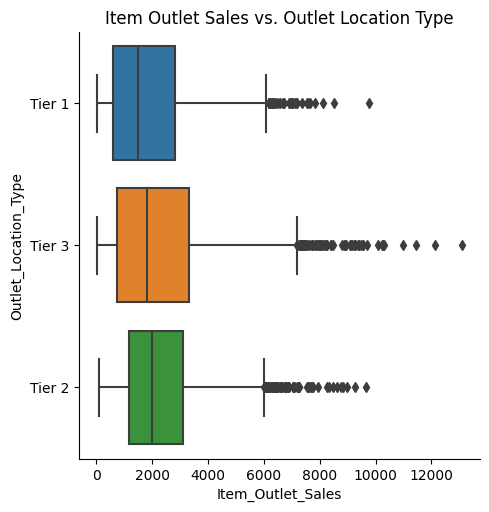

In [155]:
# Create a boxplot of smoker vs. charges
# Using catplot to make a boxplot, adding dodge=False to reduce white space
g = sns.catplot(data=df, x='Item_Outlet_Sales', y='Outlet_Location_Type',
                kind='box', dodge=False).set(title='Item Outlet Sales vs. Outlet Location Type')


- Tier 3 Outlet type has the greatest number of sales and outliers.
- the middle quartile is very similar for all outlet types.

Exploratory Analysis with Count Plots

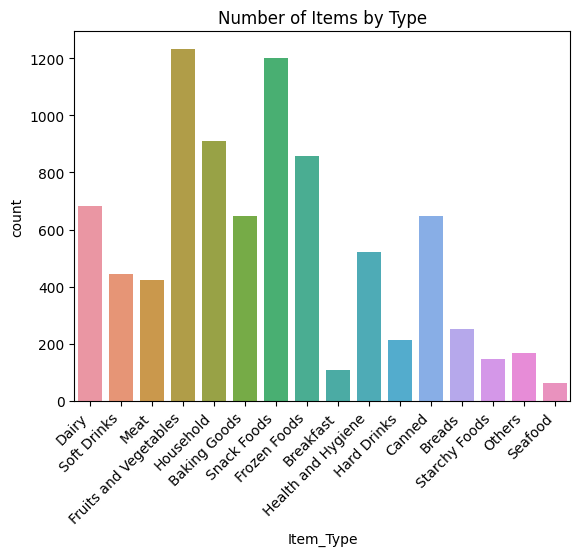

In [159]:
ax = sns.countplot(data=df, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Number of Items by Type');

- The majority of items are comprised of fruits and vegetables and snack foods.
- Breakfast food and seafood are at the low end

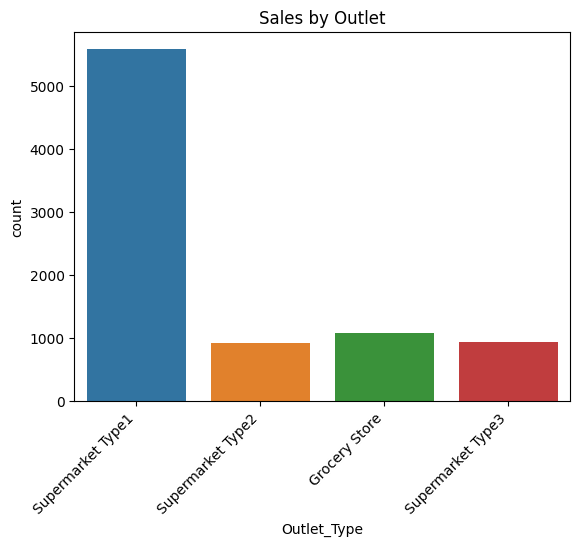

In [158]:
ax = sns.countplot(data=df, x="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Sales by Outlet');

- Supermarket Type 1 has the most items by far

In [160]:
# Find correlations
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


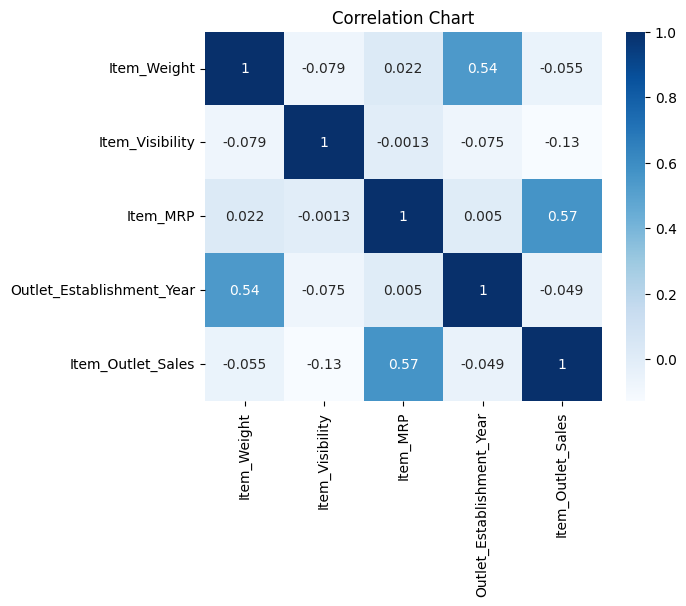

In [161]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'Blues', annot = True).set(title = 'Correlation Chart');

- The strongest positive correlation in the chart is between Item_MRP and Item_Outlet_Sales

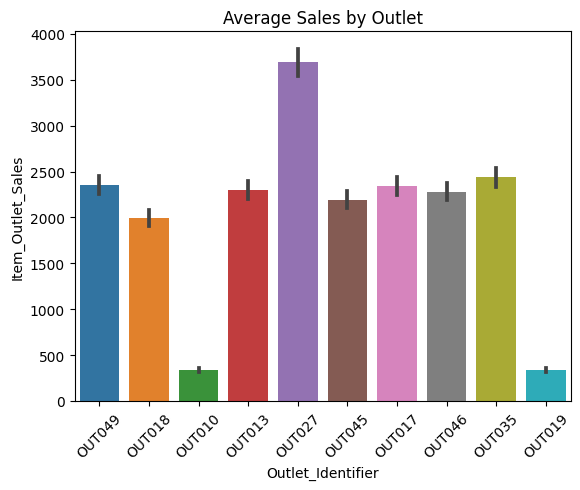

In [162]:
ax = sns.barplot(data= df, x= 'Outlet_Identifier', y= 'Item_Outlet_Sales')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Average Sales by Outlet');

- Outlet 027 has the highest average sales
- Outlet 10 and 19 have the least

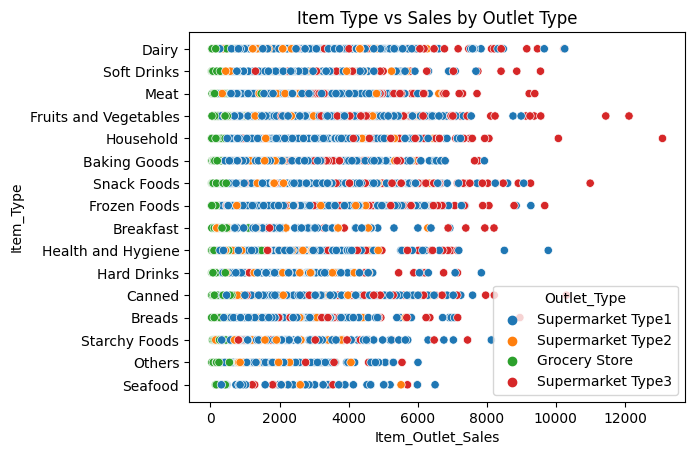

In [163]:
# Make a seaborn regplot for Outlet Location Type vs. Item Outlet Sales .
ax = sns.scatterplot(data=df, x="Item_Outlet_Sales" , y="Item_Type", hue= 'Outlet_Type').set(title= 'Item Type vs Sales by Outlet Type')

- I would not include this chart in the report due to readability.
- Supermarket Type 3 has the most outlier sales

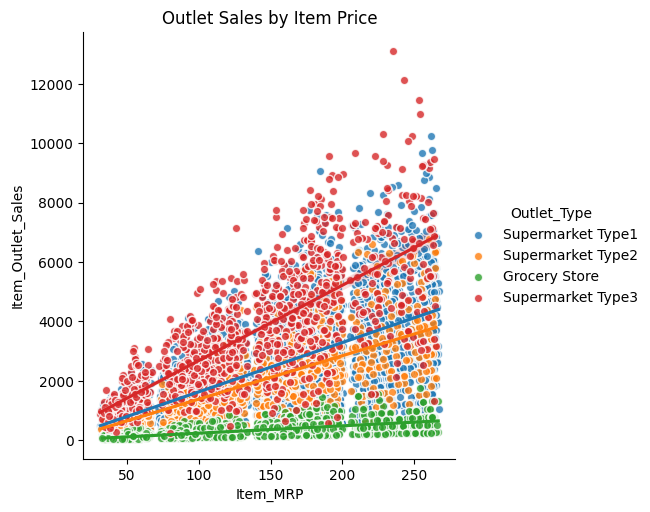

In [165]:
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
g= sns.lmplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",
               scatter_kws=scatter_kws,
                hue="Outlet_Type").set(title= 'Outlet Sales by Item Price')

-  Grocery stores show a very flat trend in sales no matter the item price
- all other types show a positive trendfor most items. Price goes up sales go up.

## Feature Inspection